<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Perceptron on XOR Gates](#Q2)
3. [Multilayer Perceptron](#Q3)
4. [Keras MMP](#Q4)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:** 
- **Input Layer:**  Receives input, data that is exposed, correlates to number of features
- **Hidden Layer:** Anything between input and output, data cannot be seen. Inside network they perform function
- **Output Layer:** Outputs vector values for whatever you need to address, helps with activation value one can interpret
- **Activation:** a logistic or sigmoid function, needs to produce a probability instead of output value, could be step functions, soft-max, relu
- **Backpropagation:** is the algorithmn that adds all the changes in weights and biases over all output neurons 
in the second to last layer to get less error
these changes are applied to weights and biases that determine the second to last layer, and the layer before that
the backpropagation routine is done for every other training example - recording how each would like to change weights and biases the changes are the negative gradient of the cost function


## 2. Perceptron on XOR Gates <a id="Q2"></a>

The XOr, or “exclusive or”, problem is a classic problem in ANN research. It is the problem of using a neural network to predict the outputs of XOr logic gates given two binary inputs. An XOr function should return a true value if the two inputs are not equal and a false value if they are equal. Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

|x1	|x2 | y |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |
| 1 | 0 | 1 |


In [3]:
import pandas as pd
data = {
    'x1': [0,0,1,1],
    'x2': [0,1,1,0],
    'y': [0,1,0,1]
}
df= pd.DataFrame.from_dict(data)
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,1,0
3,1,0,1


In [11]:
#initialize our weights

#calculate weighted sum of inputs and weights

#output the activated value for the end of 1 training epoch

class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate#learning rate
    self.niter = niter#number of iterations

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))#calculate sum of weights
        self.weight[1:] += delta_w * xi#update the weights
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)#update the error
    return self#return the whole thing

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [12]:
import numpy as np
y = df['y'].values
y = np.where(y == 0, -1, 1)
y

array([-1,  1, -1,  1])

In [13]:
X = df.iloc[0:100, [0, 2]].values
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int64)

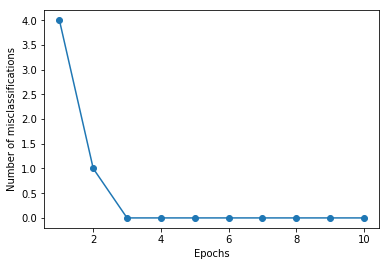

In [14]:
import matplotlib.pyplot as plt

pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


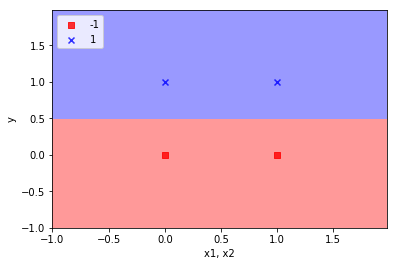

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
    alpha=0.8, c=cmap(idx),
    marker=markers[idx], label=cl)
    
plot_decision_regions(X, y, classifier=pn)
plt.xlabel('x1, x2')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

## 3. Multilayer Perceptron <a id="Q3"></a>

Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights.
Your network must have one hidden layer.
You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
Train your model on the Heart Disease dataset from UCI:



In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [63]:
X = df.values[:,0:13]
print(X.shape)
print(X)

(303, 13)
[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [119]:
y = np.array(df['target'].tolist())[np.newaxis]
y = np.transpose(y)
print(y.shape)
print(y.T)

(303, 1)
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [120]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [121]:
class NeuralNetwork:
    def __init__(self):
        self.inputs = 13 # Set up Architecture of Neural Network
        self.hiddenNodes = 3
        self.outputNodes = 1
        
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)#initalize weights, 2x3  matrix array for first layer
        
        #3x1 Matrix Array for Hidden to Output 
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
        #need sigmoid for activation functions
        #need bias terms and fixed function error metric
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward pass.
        """
#input to hidden, hidden to output        
        #Weighted sum of inputs and hidden layers, dot product of X and self weights1
        self.hidden_sum = np.dot(X, self.weights1)#with hidden sum, we calculate and return for activation function 
        
        #Activation of the weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)#activated hidden to the output layer
        
        #Weighted sum of the hidden layer to output layer
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        #Final Activation of Output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
nn = NeuralNetwork()

print(X[0])
output = nn.feed_forward(X[0])#make a feedforward pass
print("output", output)



[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
   1. ]
output [0.9420966]


In [122]:
class NeuralNetwork:
    
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 13
        self.hiddenNodes =  3
        self.outputNodes = 1

        # Initial Weights
        # 2x3 Matrix Array for the First Layer
        self.weights1 = np.random.randn(self.inputs, self.hiddenNodes)
       
        # 3x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)

    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))

    def sigmoidPrime(self, s):
        return s * (1-s)

    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward pass.
        """
        #Weighted sum of inputs and hidden layer
        self.hidden_sum = np.dot(X, self.weights1)

        #Activation of the weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)

        #Weighted sum of hidden layer to output layer
        self.output_sum = np.dot(self.activated_hidden, self.weights2)

        #Final Activation of Output
        self.activated_output = self.sigmoid(self.output_sum)

        return self.activated_output

    #sigmoid needed at this step, will take input matrix, outputs and some other term for error
    def backward(self, X, y, o):
        #this is our backward pass
        #updating weights by fixed amount which we calculated using gradient derivative of our error
        self.o_error = y - o#error in output

        #delta gives us the adjustment from the output to the hidden
        #derivative of error
        #Size of Adjustment from hidden =>output
        self.o_delta = self.o_error * self.sigmoidPrime(o) #apply derivative of sigmoid to error#basically the gradient
        #the z2 error is how much we need to change the weights by
        #delta is constant for the backward propagation pass, then gets smaller for every other pass hopefully

        self.z2_error = self.o_delta.dot(self.weights2.T)#How much the hidden layer interprets as the error
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)#this is where you might scale down the learning rate
        #we are updating the weights a fixed amount by travelling up the gradient
        
        #going from right to left
        #Adjustments from the hidden to the ouput weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)

        #Adjustment from input => hidden weights
        #taking how much we get wrong from the z2 error and z2 delta
        #weights1 is the first hidden error, we are working backwards
        self.weights1 += X.T.dot(self.z2_delta)#update the weights of the first layer by taking the dot products 
        #with self.z2_delta which is representative of a variable value of how much we need to update the weights.

        #we are not using gradient descent, we are updating the weights a fixed amount that we calculated using just the 
        #gradient derivative of our error
    def train(self, X, y):
        o = self.feed_forward(X)#calculate a forward path
        self.backward(X, y, o )#make a backwards pass
        
#Since you're never passing back a function, it only matters if you can find the derivative of the activation function
#we only care about the derivative of the activation function, the chain rule for the backprop inputs will always be a constant.
nn.weights2

array([[1.41309998],
       [1.37623174],
       [0.86875541]])

In [123]:
# We want activated that correspond to negative weights to be lower
# And we want more higher activation for positivie weights
error = y[0] - output #actual activation - ouput
error

nn = NeuralNetwork()
o_delta = error * nn.sigmoidPrime(output)

z2_error = o_delta.dot(nn.weights2.T)
z2_error#set this error aside, calculate this error for the next layer, take the error all at once, then update the weights
#based on the size of the updates
#we want the array this outputs to be the same shape as our weights

array([-0.00286472,  0.00165537,  0.00110363])

In [124]:
attributes = ['weights1', 'hidden_sum', 'activated_hidden', 'weights2', 'output+']
[print(i+'\n', getattr(nn,i), '\n'+'---'*3) for i in dir(nn) if i[:2]!= '__']

backward
 <bound method NeuralNetwork.backward of <__main__.NeuralNetwork object at 0x000001970C472D30>> 
---------
feed_forward
 <bound method NeuralNetwork.feed_forward of <__main__.NeuralNetwork object at 0x000001970C472D30>> 
---------
hiddenNodes
 3 
---------
inputs
 13 
---------
outputNodes
 1 
---------
sigmoid
 <bound method NeuralNetwork.sigmoid of <__main__.NeuralNetwork object at 0x000001970C472D30>> 
---------
sigmoidPrime
 <bound method NeuralNetwork.sigmoidPrime of <__main__.NeuralNetwork object at 0x000001970C472D30>> 
---------
train
 <bound method NeuralNetwork.train of <__main__.NeuralNetwork object at 0x000001970C472D30>> 
---------
weights1
 [[ 0.03011605  1.86919794 -1.06497881]
 [-0.94262663 -0.04693264 -0.22230485]
 [-1.04273611  1.00479357 -0.13959945]
 [ 0.16613525  0.11837814 -1.29777201]
 [-1.26999334  1.27027721 -0.42763613]
 [ 1.09521598 -2.41843496 -0.20105174]
 [-1.28432486 -0.81128073  0.87169386]
 [-0.08395461  1.525439   -1.44665636]
 [-1.22990549  1

[None, None, None, None, None, None, None, None, None, None]

In [125]:
nn = NeuralNetwork()
for i in range(1000):#1000 iterations on our model
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 200 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)
    
#some neurons in the hidden layer are more highlighted than others because with backpropagation

+---------EPOCH 1---------+
Input: 
 [[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
Actual Output: 
 [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]

In [126]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(X, y), options=options, callback=self.callbackF)#optimize or minimize my cost function

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [129]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 13
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [130]:
NN = Neural_Network()
T = trainer(NN)#pass our neural network to our trainer
T.train(X,y)

         Current function value: 36.890215
         Iterations: 9
         Function evaluations: 31
         Gradient evaluations: 19


C:\Users\lilyx\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in square
C:\Users\lilyx\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\lilyx\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in square
C:\Users\lilyx\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


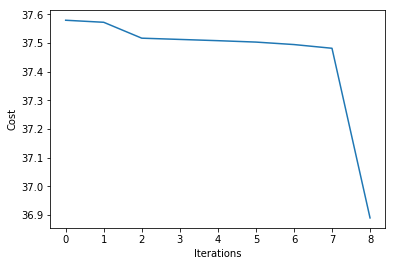

In [131]:
import matplotlib.pyplot as plt
plt.plot(T.J)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()     

## 4. Keras MMP <a id="Q4"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [137]:
from tensorflow.keras.models import Sequential#define model keras support two types of models - supporting class for more complicated or sequences like here
from tensorflow.keras.layers import Dense #columns of nodes
import numpy as np

np.random.seed(812)
model = Sequential()
model.add(Dense(1,input_dim=13,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
y = df.values[:,-1]#column 8 is our target
print(y.shape)
print(y)

(303,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [139]:
model.fit(X,y, epochs = 150)

Epoch 1/150
303/303 [==============================] - 0s 490us/sample - loss: 39.5986 - acc: 0.4554
Epoch 2/150
303/303 [==============================] - 0s 59us/sample - loss: 36.3733 - acc: 0.4554
Epoch 3/150
303/303 [==============================] - 0s 61us/sample - loss: 33.2189 - acc: 0.4554
Epoch 4/150
303/303 [==============================] - 0s 46us/sample - loss: 30.0582 - acc: 0.4554
Epoch 5/150
303/303 [==============================] - 0s 56us/sample - loss: 26.8874 - acc: 0.4554
Epoch 6/150
303/303 [==============================] - 0s 56us/sample - loss: 23.6735 - acc: 0.4554
Epoch 7/150
303/303 [==============================] - 0s 56us/sample - loss: 20.5046 - acc: 0.4554
Epoch 8/150
303/303 [==============================] - 0s 50us/sample - loss: 17.3152 - acc: 0.4554
Epoch 9/150
303/303 [==============================] - 0s 53us/sample - loss: 14.0674 - acc: 0.4554
Epoch 10/150
303/303 [==============================] - 0s 50us/sample - loss: 10.9955 - acc: 0.455

303/303 [==============================] - 0s 53us/sample - loss: 0.5743 - acc: 0.7228
Epoch 83/150
303/303 [==============================] - 0s 43us/sample - loss: 0.5682 - acc: 0.7360
Epoch 84/150
303/303 [==============================] - 0s 63us/sample - loss: 0.5651 - acc: 0.7195
Epoch 85/150
303/303 [==============================] - 0s 56us/sample - loss: 0.5613 - acc: 0.7261
Epoch 86/150
303/303 [==============================] - 0s 69us/sample - loss: 0.5580 - acc: 0.7261
Epoch 87/150
303/303 [==============================] - 0s 63us/sample - loss: 0.5545 - acc: 0.7261
Epoch 88/150
303/303 [==============================] - 0s 56us/sample - loss: 0.5523 - acc: 0.7261
Epoch 89/150
303/303 [==============================] - 0s 56us/sample - loss: 0.5525 - acc: 0.7393
Epoch 90/150
303/303 [==============================] - 0s 56us/sample - loss: 0.5457 - acc: 0.7360
Epoch 91/150
303/303 [==============================] - 0s 56us/sample - loss: 0.5422 - acc: 0.7294
Epoch 92/150


In [140]:
scores = model.evaluate(X,y)#just the feed forward portion of model to calculate just accuracy
print(f"{model.metrics_names[1]}: {scores[1]*100}")

303/303 [==============================] - 0s 102us/sample - loss: 0.4218 - acc: 0.7921
acc: 79.2079210281372


In [142]:
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
from sklearn.model_selection import train_test_split

batch_size = 50
num_class = 10
epochs = 150

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [158]:
model = Sequential()

# Input to Hidden
model.add(Dense(16, input_dim=13, activation='relu'))#first hidden layer has 16 neurons
model.add(Dense(16, activation='relu'))
# Output Layer
model.add(Dense(10, activation='softmax'))#10 classes

model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam', 
                    metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_21 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                170       
Total params: 666
Trainable params: 666
Non-trainable params: 0
_________________________________________________________________


In [159]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.3, verbose=1)
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]*100}')

Train on 190 samples, validate on 22 samples
Epoch 1/150
190/190 [==============================] - 0s 984us/sample - loss: 24.6872 - acc: 0.0000e+00 - val_loss: 17.0108 - val_acc: 0.0000e+00
Epoch 2/150
190/190 [==============================] - 0s 74us/sample - loss: 14.5473 - acc: 0.1368 - val_loss: 10.2712 - val_acc: 0.4091
Epoch 3/150
190/190 [==============================] - 0s 63us/sample - loss: 11.4446 - acc: 0.5158 - val_loss: 8.2644 - val_acc: 0.5000
Epoch 4/150
190/190 [==============================] - 0s 100us/sample - loss: 8.3672 - acc: 0.5105 - val_loss: 4.9375 - val_acc: 0.4091
Epoch 5/150
190/190 [==============================] - 0s 89us/sample - loss: 4.4461 - acc: 0.4000 - val_loss: 2.6083 - val_acc: 0.3182
Epoch 6/150
190/190 [==============================] - 0s 95us/sample - loss: 2.4725 - acc: 0.4579 - val_loss: 3.3864 - val_acc: 0.5000
Epoch 7/150
190/190 [==============================] - 0s 100us/sample - loss: 2.6505 - acc: 0.4789 - val_loss: 2.6413 - val

190/190 [==============================] - 0s 79us/sample - loss: 0.5670 - acc: 0.7368 - val_loss: 0.5340 - val_acc: 0.6818
Epoch 61/150
190/190 [==============================] - 0s 63us/sample - loss: 0.5556 - acc: 0.7421 - val_loss: 0.5310 - val_acc: 0.7273
Epoch 62/150
190/190 [==============================] - 0s 74us/sample - loss: 0.5738 - acc: 0.7053 - val_loss: 0.5360 - val_acc: 0.6818
Epoch 63/150
190/190 [==============================] - 0s 79us/sample - loss: 0.5508 - acc: 0.7474 - val_loss: 0.5337 - val_acc: 0.7273
Epoch 64/150
190/190 [==============================] - 0s 89us/sample - loss: 0.5414 - acc: 0.7632 - val_loss: 0.5396 - val_acc: 0.6818
Epoch 65/150
190/190 [==============================] - 0s 100us/sample - loss: 0.5379 - acc: 0.7632 - val_loss: 0.5471 - val_acc: 0.7727
Epoch 66/150
190/190 [==============================] - 0s 84us/sample - loss: 0.5352 - acc: 0.7474 - val_loss: 0.5312 - val_acc: 0.7273
Epoch 67/150
190/190 [==============================]

190/190 [==============================] - 0s 68us/sample - loss: 0.4421 - acc: 0.7947 - val_loss: 0.5260 - val_acc: 0.6818
Epoch 120/150
190/190 [==============================] - 0s 84us/sample - loss: 0.4225 - acc: 0.8211 - val_loss: 0.5006 - val_acc: 0.8182
Epoch 121/150
190/190 [==============================] - 0s 84us/sample - loss: 0.4192 - acc: 0.8105 - val_loss: 0.4941 - val_acc: 0.7727
Epoch 122/150
190/190 [==============================] - 0s 100us/sample - loss: 0.4074 - acc: 0.8474 - val_loss: 0.4981 - val_acc: 0.8182
Epoch 123/150
190/190 [==============================] - 0s 105us/sample - loss: 0.4072 - acc: 0.8158 - val_loss: 0.4975 - val_acc: 0.8182
Epoch 124/150
190/190 [==============================] - 0s 110us/sample - loss: 0.4028 - acc: 0.8368 - val_loss: 0.4895 - val_acc: 0.7727
Epoch 125/150
190/190 [==============================] - 0s 111us/sample - loss: 0.4253 - acc: 0.8053 - val_loss: 0.5241 - val_acc: 0.6364
Epoch 126/150
190/190 [=====================

In [161]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.9521966   0.68100522  1.97312292 ... -2.27457861 -0.71442887
  -2.14887271]
 [-1.91531289  0.68100522  1.00257707 ... -2.27457861 -0.71442887
  -0.51292188]
 [-1.47415758 -1.46841752  0.03203122 ...  0.97635214 -0.71442887
  -0.51292188]
 ...
 [ 1.50364073  0.68100522 -0.93851463 ... -0.64911323  1.24459328
   1.12302895]
 [ 0.29046364  0.68100522 -0.93851463 ... -0.64911323  0.26508221
   1.12302895]
 [ 0.29046364 -1.46841752  0.03203122 ... -0.64911323  0.26508221
  -0.51292188]]


In [172]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# define the grid search parameters
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

C:\Users\lilyx\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best: 0.6435643633206686 using {'batch_size': 10, 'epochs': 20}
Means: 0.6435643633206686, Stdev: 0.09801480023980266 with: {'batch_size': 10, 'epochs': 20}
Means: 0.6072607239087423, Stdev: 0.1838731048446351 with: {'batch_size': 20, 'epochs': 20}
Means: 0.5742574234803518, Stdev: 0.19249725088068645 with: {'batch_size': 40, 'epochs': 20}
Means: 0.6303630371888479, Stdev: 0.10236345271677881 with: {'batch_size': 60, 'epochs': 20}
Means: 0.5643564462661743, Stdev: 0.13599603069479688 with: {'batch_size': 80, 'epochs': 20}
Means: 0.6072607437769572, Stdev: 0.17040701058847882 with: {'batch_size': 100, 'epochs': 20}


In [173]:
# define the grid search parameters
param_grid = {'batch_size': [10,80],
              'epochs': [20, 40, 60,200]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.7392739256223043 using {'batch_size': 80, 'epochs': 40}
Means: 0.6237623890240988, Stdev: 0.11113833164922167 with: {'batch_size': 10, 'epochs': 20}
Means: 0.6831683119138082, Stdev: 0.09323067008817769 with: {'batch_size': 10, 'epochs': 40}
Means: 0.6501650214195251, Stdev: 0.0890477711927088 with: {'batch_size': 10, 'epochs': 60}
Means: 0.6996699571609497, Stdev: 0.0567810333488688 with: {'batch_size': 10, 'epochs': 200}
Means: 0.5082508126894633, Stdev: 0.2133249113268889 with: {'batch_size': 80, 'epochs': 20}
Means: 0.7392739256223043, Stdev: 0.048728797331330224 with: {'batch_size': 80, 'epochs': 40}
Means: 0.6105610728263855, Stdev: 0.12242399790778163 with: {'batch_size': 80, 'epochs': 60}
Means: 0.669966995716095, Stdev: 0.07511424016599029 with: {'batch_size': 80, 'epochs': 200}


In [174]:
# define the grid search parameters
param_grid = {'batch_size': [50, 80, 120],
              'epochs': [30, 40, 60]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.7227722803751627 using {'batch_size': 120, 'epochs': 40}
Means: 0.4422442118326823, Stdev: 0.17901057088182598 with: {'batch_size': 50, 'epochs': 30}
Means: 0.5841584304968516, Stdev: 0.11230825014069684 with: {'batch_size': 50, 'epochs': 40}
Means: 0.603960394859314, Stdev: 0.14025432510167354 with: {'batch_size': 50, 'epochs': 60}
Means: 0.5775577674309412, Stdev: 0.248556707560995 with: {'batch_size': 80, 'epochs': 30}
Means: 0.5775577624638876, Stdev: 0.10519722816230292 with: {'batch_size': 80, 'epochs': 40}
Means: 0.7194719513257345, Stdev: 0.030606009653565885 with: {'batch_size': 80, 'epochs': 60}
Means: 0.5148515005906423, Stdev: 0.13790484396786407 with: {'batch_size': 120, 'epochs': 30}
Means: 0.7227722803751627, Stdev: 0.029147743940335084 with: {'batch_size': 120, 'epochs': 40}
Means: 0.7029703060785929, Stdev: 0.06907079559684301 with: {'batch_size': 120, 'epochs': 60}


In [175]:
# define the grid search parameters
param_grid = {'batch_size': [100, 120, 160],
              'epochs': [30, 40, 80]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.7986798683802286 using {'batch_size': 120, 'epochs': 30}
Means: 0.6039604047934214, Stdev: 0.35339740137832026 with: {'batch_size': 100, 'epochs': 30}
Means: 0.6600660085678101, Stdev: 0.053826764654122956 with: {'batch_size': 100, 'epochs': 40}
Means: 0.5049504935741425, Stdev: 0.18646135389123386 with: {'batch_size': 100, 'epochs': 80}
Means: 0.7986798683802286, Stdev: 0.112114124532204 with: {'batch_size': 120, 'epochs': 30}
Means: 0.6468646824359894, Stdev: 0.11211411108029981 with: {'batch_size': 120, 'epochs': 40}
Means: 0.6204620599746704, Stdev: 0.06584138563353711 with: {'batch_size': 120, 'epochs': 80}
Means: 0.4587458868821462, Stdev: 0.1756941592688734 with: {'batch_size': 160, 'epochs': 30}
Means: 0.5973597466945648, Stdev: 0.2339279890957002 with: {'batch_size': 160, 'epochs': 40}
Means: 0.6336633563041687, Stdev: 0.14370654534443086 with: {'batch_size': 160, 'epochs': 80}
